## Numpy essentiel pour le traitement d'image OpenCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd drive/MyDrive/OpenCV-Cours/OpenCV/data

/content/drive/MyDrive/OpenCV-Cours/OpenCV/data


In [4]:
# Lire une image
pap = plt.imread('papillon.jpg')

##### Il existe de nombreuses façons d'afficher une image, pour l'instant on vas utiliser `matplotlib`:

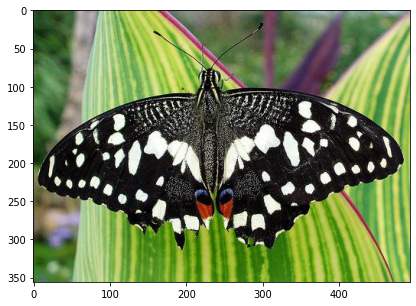

In [5]:
plt.figure(figsize=(15, 5))
plt.imshow(pap)

##### De nombreux algorithmes utilisent le niveaux de gris car ils sont plus faciles à travailler avec.

In [6]:
pap_gris = cv2.cvtColor(pap,cv2.COLOR_BGR2GRAY)

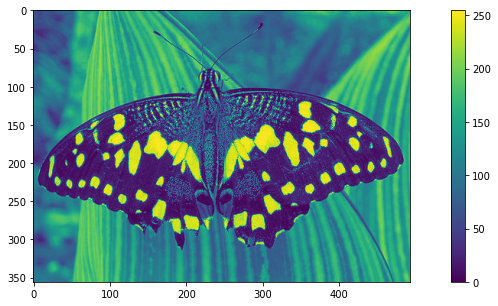

In [7]:
plt.figure(figsize=(15, 5))
plt.imshow(pap_gris) # a cause de colormap (rainbow scale)
plt.colorbar()

##### pour afficher en niveau de gris ajouter 

```
cmap='gray'
```



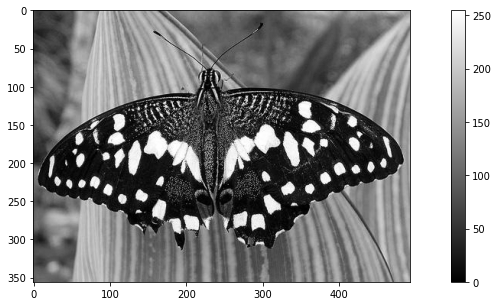

In [8]:
plt.figure(figsize=(15, 5))
plt.imshow(pap_gris,cmap='gray')
plt.colorbar()

##### Assurons-nous de comprendre nos données

In [9]:
print(pap.shape)
print(pap_gris.shape)

(356, 493, 3)
(356, 493)


##### Le format ci-dessus est (hauteur, largeur, nombre de canaux)
*   Si numchannels = 1, comme pour les niveaux de gris, il est omis
*   Pour les images couleur RVB/BGR/HSV, numchannels=3
*   Vous pourriez avoir numchannels=4 cela se produit pour les images RGBA (rouge, vert, bleu, alpha)
*   Alpha est la transparence (0=transparent, 1 ou 255 (selon votre type de données) = opaque)

##### Rappelez-vous également comment obtenir le data type.

In [10]:
pap.dtype

dtype('uint8')

##### `uint8`, qui signifie des nombres entiers compris entre 0 et 255, est standard pour les images de caméra personnelle.
##### à des fins scientifiques, le `float` est souvent utilisé.

In [11]:
pap_gris_float = pap_gris.astype(np.double)/255.0 #généralement on utilise les valeurs dans la plage 0-1 pour des calcules scientifiques

In [12]:
pap_gris_float.dtype

dtype('float64')

##### obtenir la largeur et la hauteur de l'image dans des variables séparées

In [13]:
height, width = pap_gris.shape[0:2]

In [14]:
height, width

(356, 493)

#### Notes:
*   rappelez-vous toujours que la dimension vient en premier (comme dans Matlab), et la hauteur est avant la largeur.
*   lors de l'indexation, [0:2] est seulement 0 et 1, pas 0,1,2
*   Python utilise une convention 0:N-1

In [15]:
height, width = pap_gris.shape[:2]

In [16]:
height, width

(356, 493)

##### Extraire les canaux RGB :

In [17]:
redc = pap[:,:,0]
greenc = pap[:,:,1]
bluec = pap[:,:,2]


##### Notez que ceux-ci seront tous singleton dans la dimension numchannels

In [18]:
bluec.shape

(356, 493)

##### Comment recombiner ?
*   créez d'abord une nouvelle image vierge avec des dimensions appropriées

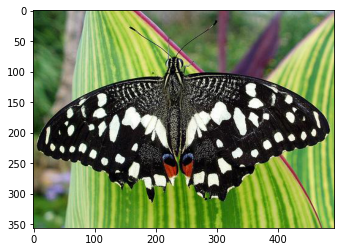

In [21]:
combine = np.zeros((height,width,3),np.uint8)

combine[:,:,0]=redc
combine[:,:,1]=greenc
combine[:,:,2]=bluec

plt.figure()
plt.imshow(combine)

##### Il est facile d'extraire une région d'intérêt d'une image (ROI)
*   disons que nous voulons examiner de plus près la tête du papillon ;
*   nous pouvons obtenir une boîte englobante à partir de la figure ci-dessus

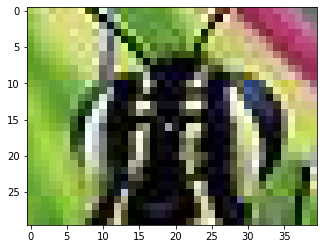

In [22]:
tete_pap = pap[70:100,210:250]

plt.figure()
plt.imshow(tete_pap)


##### Modifier des pixels est également simple :

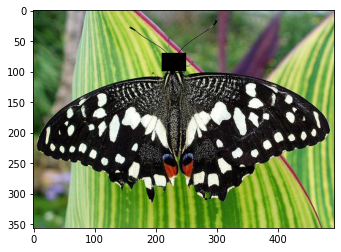

In [29]:
combine[70:100,210:250] = 0
plt.figure()
plt.imshow(combine)

#### Exercices suggérés pour tester vos connaissances :

1.   Prenez une image et écrivez un gros signe + dessus (c'est-à-dire deux blocs de pixels noirs ; un s'étendant de haut en bas, l'autre de gauche à droite, mais n'occupant pas toute l'image)
2.   Créez une fonction qui prendra deux images et renverra une image qui les combine en une image côte à côte.


In [ ]:
def cote_a_cote(imgauche,imdroite):
    nvimhauteur=...
    nvimlargeur=...
    nvim = np.zeros(...)
    ...
    ...
    ...
    return nvim

##### Ajout avec `numpy` vs ajout avec `OpenCV`
*   numpy fait l'addition modulaire ie `250+10 =4 (en supposant uint8/mod255)`
*   OpenCV l'addition saturéé 

In [30]:
x = np.uint8([250])
y = np.uint8([10])
cv2.add(x,y)

array([[255]], dtype=uint8)

##### C'est généralement ce que vous voulez pour combiner des images
*   `cv2.subtract` fonctionne de la même manière
*   bien sûr, les images devront avoir la même dimension pour que l'addition/soustraction fonctionne.

#### Mélange pondéré d'images

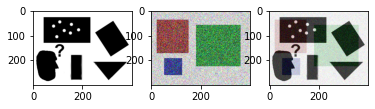

In [31]:
img1 = plt.imread('pic1.png')
img2 = plt.imread('pic2.png')
#alpha = 0,7, 0,3=1-0,7 ; assurez-vous que ces valeurs s'ajoutent à 1 si vous voulez "conserver la luminosité"
dst = cv2.addWeighted(img1,0.7,img2,0.3, 0)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(img1)
plt.subplot(1,3,2)
plt.imshow(img2)
plt.subplot(1,3,3)
plt.imshow(dst)